In [1]:
# import libraries and define global settings
import numpy as np
import matplotlib.pyplot as plt

# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })
     


# Exe: 1

In [2]:
X = np.random.normal(0,np.sqrt(2),size=10000)

# report the mean and variance
print(f'Empirical mean = {np.mean(X):.3f}')
print(f'Empirical variance = {np.var(X,ddof=1):.3f}')

Empirical mean = 0.008
Empirical variance = 1.993


In [3]:
# sample sizes
Ns = np.arange(10,10200,step=200)

# initialize outputs
means = np.zeros(len(Ns))
vars  = np.zeros(len(Ns))

# run experiment
for i,n in enumerate(Ns):

  # generate random data
  X = np.random.normal(0,np.sqrt(2),size=n)
  
  # compute mean and variance
  means[i] = np.mean(X)
  vars[i]  = np.var(X,ddof=1)

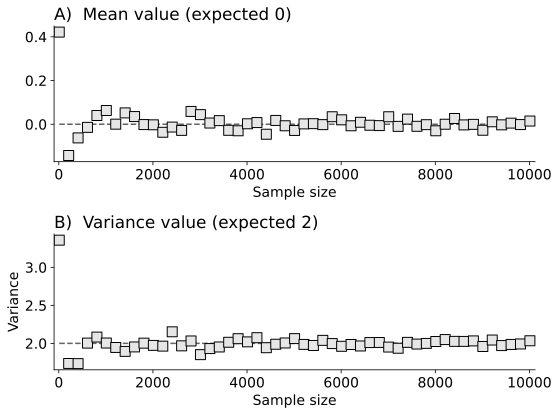

In [4]:
# plot
_,axs = plt.subplots(2,1,figsize=(8,6))

axs[0].plot(Ns[[0,-1]],[0,0],'--',color=(.4,.4,.4))
axs[0].plot(Ns,means,'ks',markerfacecolor=(.9,.9,.9),markersize=10)
axs[0].set(xlim=[-100,Ns[-1]+110],xlabel='Sample size')
axs[0].set_title(r'A)  Mean value (expected 0)',loc='left')

axs[1].plot(Ns[[0,-1]],[2,2],'--',color=(.4,.4,.4))
axs[1].plot(Ns,vars,'ks',markerfacecolor=(.9,.9,.9),markersize=10)
axs[1].set(xlim=[-100,Ns[-1]+110],ylabel='Variance')
axs[1].set_xlabel('Sample size')
axs[1].set_title(r'B)  Variance value (expected 2)',loc='left')


# display the figure
plt.tight_layout()
plt.show()

# Exe 2

In [5]:
# uniform data with boundaries [-3,8]
a,b = -3,8
Y = np.random.uniform(a,b,size=1324)

# compute mean and variance discrepancies
meanDiff = np.mean(Y) - (a+b)/2
varDiff  = ( np.var(Y,ddof=1) - (b-a)**2/12 )**2

# print the results
print(f'Mean discrepancy (signed): {meanDiff:.3f}')
print(f'Variance discrepancy (squared): {varDiff:.3f}')




Mean discrepancy (signed): 0.077
Variance discrepancy (squared): 0.000


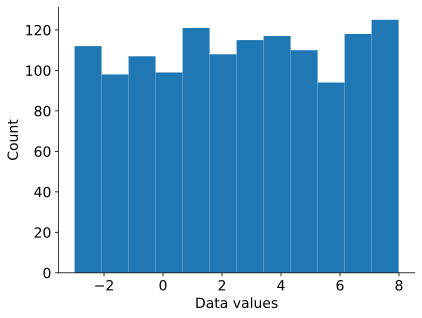

In [6]:
# histogram
plt.hist(Y,bins='fd')
plt.xlabel('Data values')
plt.ylabel('Count')
plt.show()
     

In [8]:
# sample sizes
Ns = np.arange(10,10200,step=200)

# initialize outputs
means = np.zeros(len(Ns))
vars  = np.zeros(len(Ns))

# run experiment
for i,N in enumerate(Ns):

  # generate random data (sorting to ensure a>b)
  a,b = np.sort( np.random.randint(-3,11,2) )
  Y = np.random.uniform(a,b,size=N)

  # compute mean and variance discrepancies
  means[i] = np.mean(Y) - (a+b)/2
  vars[i]  = ( np.var(Y,ddof=1) - (b-a)**2/12 )**2

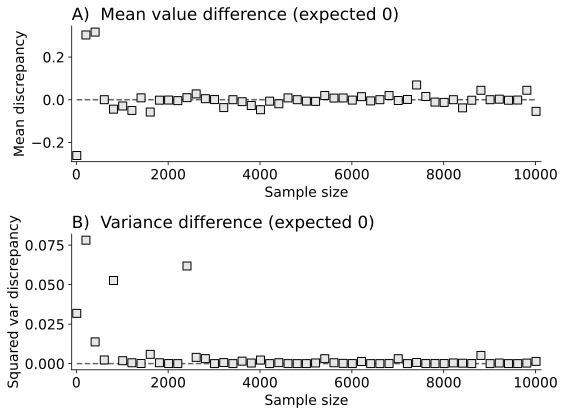

In [9]:
# plot 
_,axs = plt.subplots(2,1,figsize=(8,6))

axs[0].plot(Ns[[0,-1]],[0,0],'--',color=(.4,.4,.4))
axs[0].plot(Ns,means,'ks',markerfacecolor=(.9,.9,.9),markersize=8)
axs[0].set(xlim=[-100,Ns[-1]+110],xlabel='Sample size',ylabel='Mean discrepancy')
axs[0].set_title(r'A)  Mean value difference (expected 0)',loc='left')

axs[1].plot(Ns[[0,-1]],[0,0],'--',color=(.4,.4,.4))
axs[1].plot(Ns,vars,'ks',markerfacecolor=(.9,.9,.9),markersize=8)
axs[1].set(xlim=[-100,Ns[-1]+110],ylabel='Squared var discrepancy')
axs[1].set_xlabel('Sample size')
axs[1].set_title(r'B)  Variance difference (expected 0)',loc='left')


# display the figure
plt.tight_layout()
plt.show()